In [50]:
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
mpl.rcParams['figure.figsize'] = (12,12)
import seaborn as sns
sns.set_style("white", {"font.family": "serif"})

In [51]:
import sys
sys.path.append('../../../python-modules')

In [52]:
from utilities import filemanip

In [53]:
from synthanalysis import imb

In [54]:
nodelist = [1, 2, 4, 8, 16]
baseline = 'cores'
compare = ['rank','cyclic']
sizelist = [0,
            4,
            8,
           16,
           32,
           64,
          128,
          256,
          512,
         1024,
         2048,
         4096,
         8192,
        16384,
        32768,
        65536,
       131072,
       262144,
       524288,
      1048576,
      2097152,
      4194304]
bindings = ['cores','rank','cyclic']

## Ping Pong

In [55]:
benchmark = 'PingPong'
imb_perf = {}
for binding in bindings:
    tdict = {}
    for nodes in nodelist:
        pattern = f'IMB_{benchmark}_{nodes}nodes_*_{binding}_*.out'
        imbfiles = filemanip.get_filelist_pattern('../results/ARCHER2_CrayMPICH8015_pinning', pattern)
        for file in imbfiles:
            imb_dict = imb.get_perf_dict(file, nodes)
            tdict.update(imb_dict)
    imb_perf[binding] = tdict

IMB PingPong performance relative to cores binding
            #nodes
      #bytes         1         2         4         8        16
rank
           0      0.00      0.00      0.00      0.00      0.00
           4      2.58      2.43      2.46      2.47      2.33
           8      2.19      2.19      2.40      2.39      2.25
          16      2.43      2.42      2.56      1.89      2.12
          32      2.46      1.86      2.14      2.45      2.32
          64      2.44      2.42      2.49      2.37      1.98
         128      2.45      2.38      2.35      2.30      2.35
         256      1.92      2.02      2.60      2.75      2.68
         512      1.99      2.80      2.22      2.27      2.62
        1024      1.78      2.69      2.39      2.28      2.78
        2048      2.29      2.56      2.90      2.54      2.70
        4096      2.92      3.20      3.21      3.15      3.13
        8192      2.22      3.01      2.98      2.76      2.21
       16384      1.94      2.34      2.57 

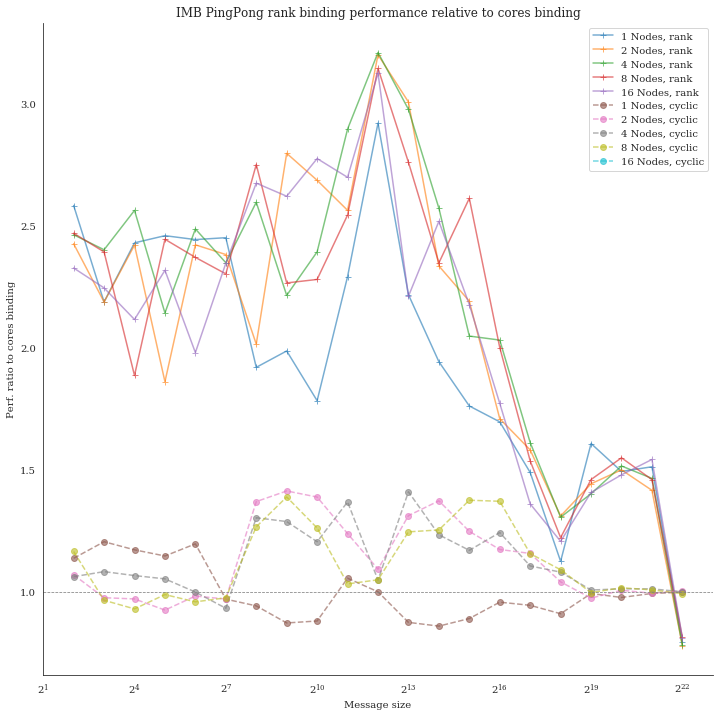

In [56]:
print("IMB {0} performance relative to cores binding".format(benchmark))
imb_ratio = imb.analyse_perf_matrix(baseline, compare, nodelist, sizelist, imb_perf, invert=False)
for nodes in nodelist:
    plt.plot(sizelist, imb.get_size_scaling(sizelist, nodes, imb_ratio['rank']), '-+', label=f'{nodes} Nodes, rank', alpha=0.6)
for nodes in nodelist:
    plt.plot(sizelist, imb.get_size_scaling(sizelist, nodes, imb_ratio['cyclic']), '--o', label=f'{nodes} Nodes, cyclic', alpha=0.6)
plt.axhline(y=1, c='gray', ls='--', lw=0.75)
sns.despine()
plt.xscale('log', basex=2)
plt.xlabel("Message size")
plt.ylabel("Perf. ratio to cores binding")
plt.title(f'IMB {benchmark} rank binding performance relative to cores binding')
plt.legend(loc='best')

## Sendrecv

In [57]:
benchmark = 'Sendrecv'
imb_perf = {}
for binding in bindings:
    tdict = {}
    for nodes in nodelist:
        pattern = f'IMB_{benchmark}_{nodes}nodes_*_{binding}_*.out'
        imbfiles = filemanip.get_filelist_pattern('../results/ARCHER2_CrayMPICH8015_pinning', pattern)
        for file in imbfiles:
            imb_dict = imb.get_perf_dict(file, nodes)
            tdict.update(imb_dict)
    imb_perf[binding] = tdict

IMB Sendrecv performance relative to cores binding
            #nodes
      #bytes         1         2         4         8        16
rank
           0      0.00      0.00      0.00      0.00      0.00
           4      1.75      0.46      1.78      1.88      1.94
           8      1.79      2.13      1.50      2.13      2.42
          16      1.87      2.31      2.44      2.22      1.92
          32      1.05      1.94      2.34      1.58      1.95
          64      2.26      2.31      2.47      1.95      2.96
         128      2.04      2.23      2.16      2.22      1.36
         256      2.52      2.18      2.35      2.84      2.38
         512      2.11      0.50      1.60      1.54      2.00
        1024      1.38      2.35      1.66      2.15      1.11
        2048      2.98      3.66      3.69      3.86      3.39
        4096      4.46      4.36      4.17      4.29      4.46
        8192      1.59      1.43      1.28      1.11      1.19
       16384      1.29      0.99      1.00 

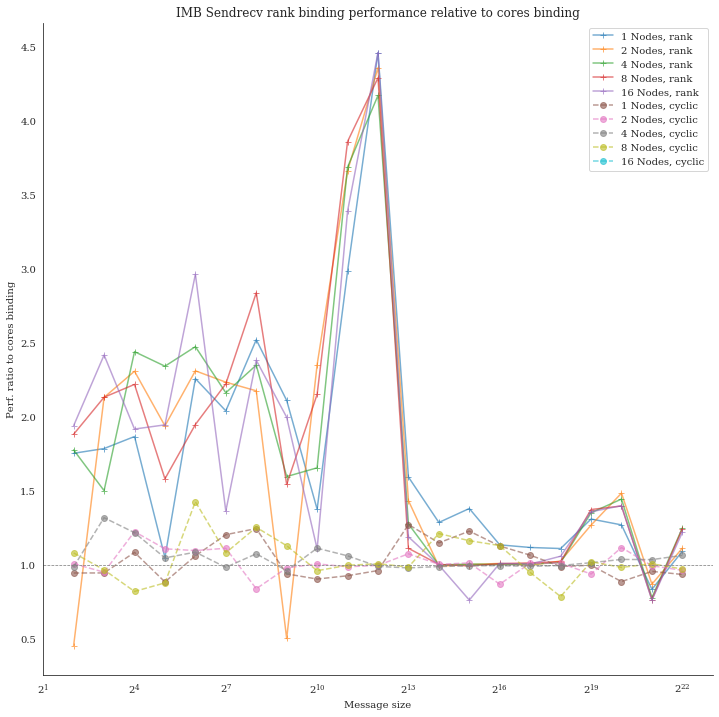

In [58]:
print("IMB {0} performance relative to cores binding".format(benchmark))
imb_ratio = imb.analyse_perf_matrix(baseline, compare, nodelist, sizelist, imb_perf, invert=False)
for nodes in nodelist:
    plt.plot(sizelist, imb.get_size_scaling(sizelist, nodes, imb_ratio['rank']), '-+', label=f'{nodes} Nodes, rank', alpha=0.6)
for nodes in nodelist:
    plt.plot(sizelist, imb.get_size_scaling(sizelist, nodes, imb_ratio['cyclic']), '--o', label=f'{nodes} Nodes, cyclic', alpha=0.6)
plt.axhline(y=1, c='gray', ls='--', lw=0.75)
sns.despine()
plt.xscale('log', basex=2)
plt.xlabel("Message size")
plt.ylabel("Perf. ratio to cores binding")
plt.title(f'IMB {benchmark} rank binding performance relative to cores binding')
plt.legend(loc='best')

## Allgather

In [59]:
benchmark = 'Allgather'
imb_perf = {}
for binding in bindings:
    tdict = {}
    for nodes in nodelist:
        pattern = f'IMB_{benchmark}_{nodes}nodes_*_{binding}_*.out'
        imbfiles = filemanip.get_filelist_pattern('../results/ARCHER2_CrayMPICH8015_pinning', pattern)
        for file in imbfiles:
            imb_dict = imb.get_perf_dict(file, nodes)
            tdict.update(imb_dict)
    imb_perf[binding] = tdict

IMB Allgather performance relative to cores binding
            #nodes
      #bytes         1         2         4         8        16
rank
           0      1.00      1.00      1.00      1.00      1.00
           4      1.14      1.07      1.24      1.42      1.71
           8      1.18      1.20      1.50      1.83      2.14
          16      1.34      1.63      2.07      2.30      2.73
          32      1.87      2.23      2.48      2.98      1.67
          64      2.88      2.64      3.31      1.77      1.80
         128      3.81      3.55      1.94      1.94      1.90
         256      5.13      2.18      2.14      2.06      2.21
         512      2.99      2.50      2.30      2.40      2.48
        1024      3.44      2.68      2.63      2.68      2.72
        2048      4.76      3.87      3.87      3.00      2.35
        4096      6.17      5.03      5.25      2.51      2.14
        8192      4.26      3.28      3.37      2.57      2.54
       16384      5.38      3.61      2.67

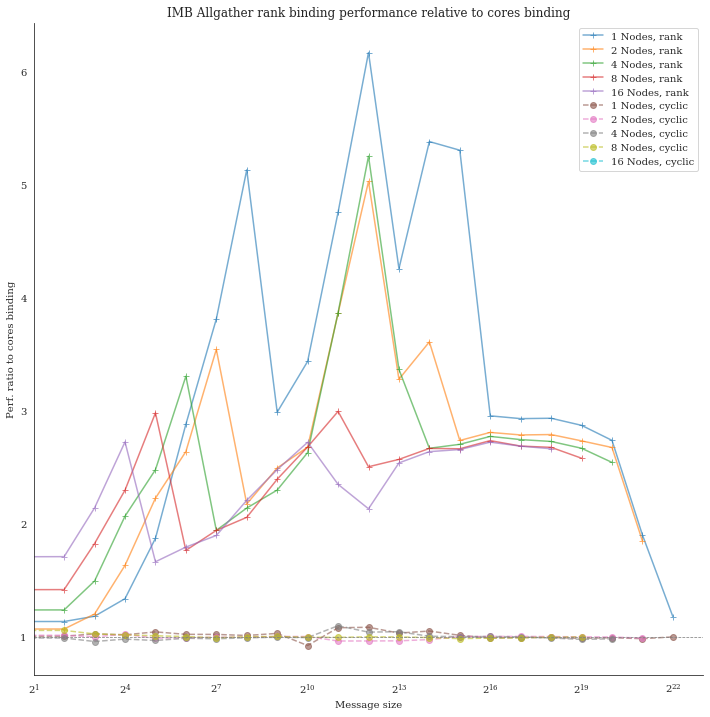

In [60]:
print("IMB {0} performance relative to cores binding".format(benchmark))
imb_ratio = imb.analyse_perf_matrix(baseline, compare, nodelist, sizelist, imb_perf, invert=True)
for nodes in nodelist:
    plt.plot(sizelist, imb.get_size_scaling(sizelist, nodes, imb_ratio['rank']), '-+', label=f'{nodes} Nodes, rank', alpha=0.6)
for nodes in nodelist:
    plt.plot(sizelist, imb.get_size_scaling(sizelist, nodes, imb_ratio['cyclic']), '--o', label=f'{nodes} Nodes, cyclic', alpha=0.6)
plt.axhline(y=1, c='gray', ls='--', lw=0.75)
sns.despine()
plt.xscale('log', basex=2)
plt.xlabel("Message size")
plt.ylabel("Perf. ratio to cores binding")
plt.title(f'IMB {benchmark} rank binding performance relative to cores binding')
plt.legend(loc='best')

## Allgatherv

In [61]:
benchmark = 'Allgatherv'
imb_perf = {}
for binding in bindings:
    tdict = {}
    for nodes in nodelist:
        pattern = f'IMB_{benchmark}_{nodes}nodes_*_{binding}_*.out'
        imbfiles = filemanip.get_filelist_pattern('../results/ARCHER2_CrayMPICH8015_pinning', pattern)
        for file in imbfiles:
            imb_dict = imb.get_perf_dict(file, nodes)
            tdict.update(imb_dict)
    imb_perf[binding] = tdict

IMB Allgatherv performance relative to cores binding
            #nodes
      #bytes         1         2         4         8        16
rank
           0      1.04      1.00      1.02      1.02      1.02
           4      1.10      1.09      1.10      1.32      1.36
           8      1.16      1.19      1.40      1.43      1.42
          16      1.22      1.52      1.51      1.63      1.72
          32      1.70      1.76      1.85      2.05      1.34
          64      2.13      2.11      2.39      1.50      1.48
         128      2.81      2.92      1.67      1.66      1.66
         256      3.75      1.94      1.91      1.83      1.87
         512      2.45      2.33      2.18      2.14      2.10
        1024      2.78      2.53      2.39      2.28      2.33
        2048      4.04      4.03      3.70      2.48      2.22
        4096      5.53      5.37      5.26      2.28      2.15
        8192      3.93      3.66      3.32      2.57      2.59
       16384      4.79      3.88      2.6

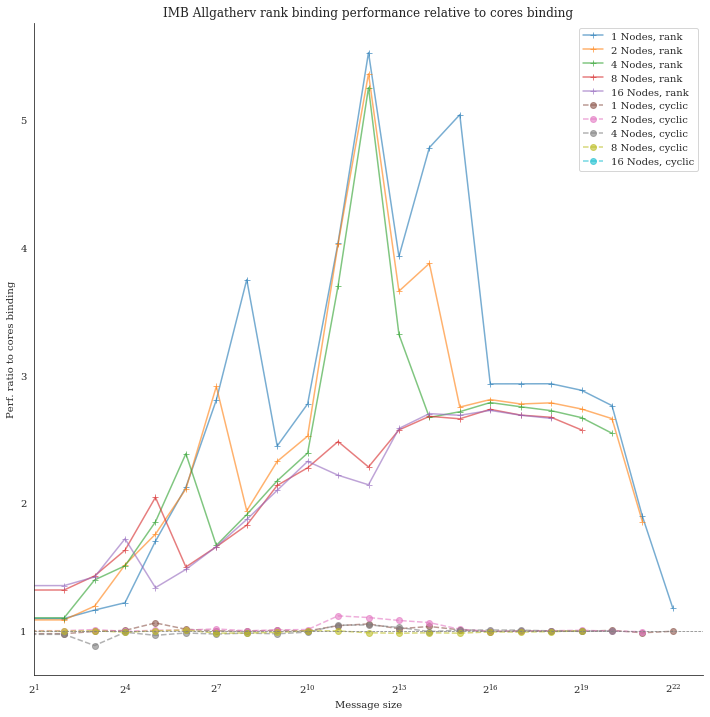

In [62]:
print("IMB {0} performance relative to cores binding".format(benchmark))
imb_ratio = imb.analyse_perf_matrix(baseline, compare, nodelist, sizelist, imb_perf, invert=True)
for nodes in nodelist:
    plt.plot(sizelist, imb.get_size_scaling(sizelist, nodes, imb_ratio['rank']), '-+', label=f'{nodes} Nodes, rank', alpha=0.6)
for nodes in nodelist:
    plt.plot(sizelist, imb.get_size_scaling(sizelist, nodes, imb_ratio['cyclic']), '--o', label=f'{nodes} Nodes, cyclic', alpha=0.6)
plt.axhline(y=1, c='gray', ls='--', lw=0.75)
sns.despine()
plt.xscale('log', basex=2)
plt.xlabel("Message size")
plt.ylabel("Perf. ratio to cores binding")
plt.title(f'IMB {benchmark} rank binding performance relative to cores binding')
plt.legend(loc='best')

## Allreduce

In [63]:
benchmark = 'Allreduce'
imb_perf = {}
for binding in bindings:
    tdict = {}
    for nodes in nodelist:
        pattern = f'IMB_{benchmark}_{nodes}nodes_*_{binding}_*.out'
        imbfiles = filemanip.get_filelist_pattern('../results/ARCHER2_CrayMPICH8015_pinning', pattern)
        for file in imbfiles:
            imb_dict = imb.get_perf_dict(file, nodes)
            tdict.update(imb_dict)
    imb_perf[binding] = tdict

IMB Allreduce performance relative to cores binding
            #nodes
      #bytes         1         2         4         8        16
rank
           0      1.00      1.00      1.00      1.00      1.00
           4      1.22      1.12      1.12      1.09      1.09
           8      1.20      1.01      1.14      1.06      1.08
          16      1.24      1.11      1.14      0.98      1.09
          32      1.24      1.09      1.16      1.02      1.02
          64      1.34      1.19      1.18      1.14      1.12
         128      1.31      1.16      1.17      1.14      1.12
         256      1.29      1.09      1.08      1.10      1.10
         512      1.26      1.19      1.11      1.11      1.16
        1024      1.34      1.22      1.13      0.97      0.98
        2048      1.60      1.43      1.36      1.36      1.33
        4096      1.93      1.44      1.53      1.36      1.34
        8192      2.37      1.82      1.75      1.66      1.69
       16384      3.47      2.69      2.43

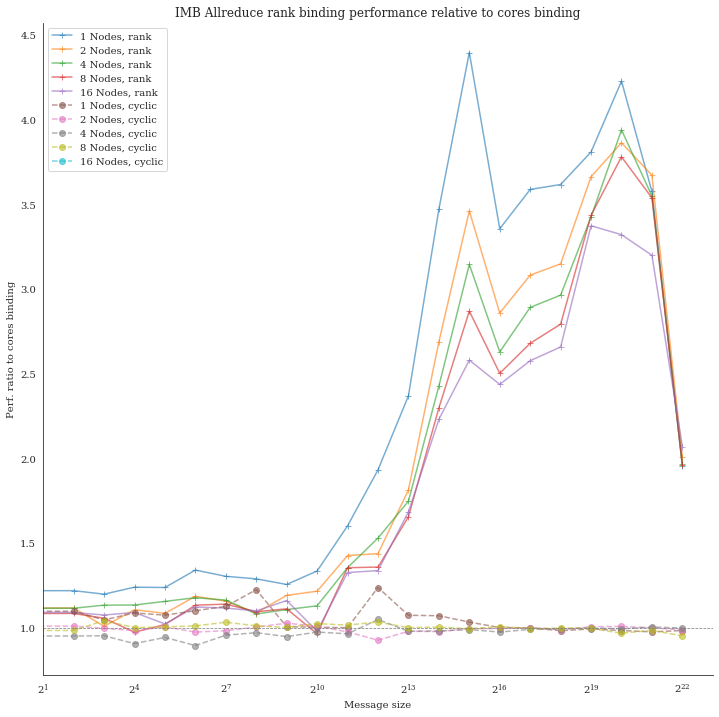

In [64]:
print("IMB {0} performance relative to cores binding".format(benchmark))
imb_ratio = imb.analyse_perf_matrix(baseline, compare, nodelist, sizelist, imb_perf, invert=True)
for nodes in nodelist:
    plt.plot(sizelist, imb.get_size_scaling(sizelist, nodes, imb_ratio['rank']), '-+', label=f'{nodes} Nodes, rank', alpha=0.6)
for nodes in nodelist:
    plt.plot(sizelist, imb.get_size_scaling(sizelist, nodes, imb_ratio['cyclic']), '--o', label=f'{nodes} Nodes, cyclic', alpha=0.6)
plt.axhline(y=1, c='gray', ls='--', lw=0.75)
sns.despine()
plt.xscale('log', basex=2)
plt.xlabel("Message size")
plt.ylabel("Perf. ratio to cores binding")
plt.title(f'IMB {benchmark} rank binding performance relative to cores binding')
plt.legend(loc='best')

## Alltoall

In [65]:
benchmark = 'Alltoall'
imb_perf = {}
for binding in bindings:
    tdict = {}
    for nodes in nodelist:
        pattern = f'IMB_{benchmark}_{nodes}nodes_*_{binding}_*.out'
        imbfiles = filemanip.get_filelist_pattern('../results/ARCHER2_CrayMPICH8015_pinning', pattern)
        for file in imbfiles:
            imb_dict = imb.get_perf_dict(file, nodes)
            tdict.update(imb_dict)
    imb_perf[binding] = tdict

IMB Alltoall performance relative to cores binding
            #nodes
      #bytes         1         2         4         8        16
rank
           0      1.00      1.00      1.00      1.00      1.00
           4      1.00      1.01      1.04      1.03      1.00
           8      0.98      1.02      0.99      1.00      0.99
          16      1.01      0.98      1.03      1.01      0.98
          32      1.02      1.10      1.08      1.05      1.06
          64      0.99      1.28      1.11      1.06      1.10
         128      1.03      1.18      1.09      1.04      1.08
         256      1.01      1.09      1.05      1.05      1.05
         512      0.97      1.05      1.06      1.04      1.85
        1024      1.43      1.69      1.67      1.63      1.84
        2048      1.14      1.47      1.28      1.37      1.22
        4096      1.09      1.26      1.18      1.16      1.13
        8192      1.40      1.01      0.97      1.01      1.02
       16384      1.19      1.03      1.01 

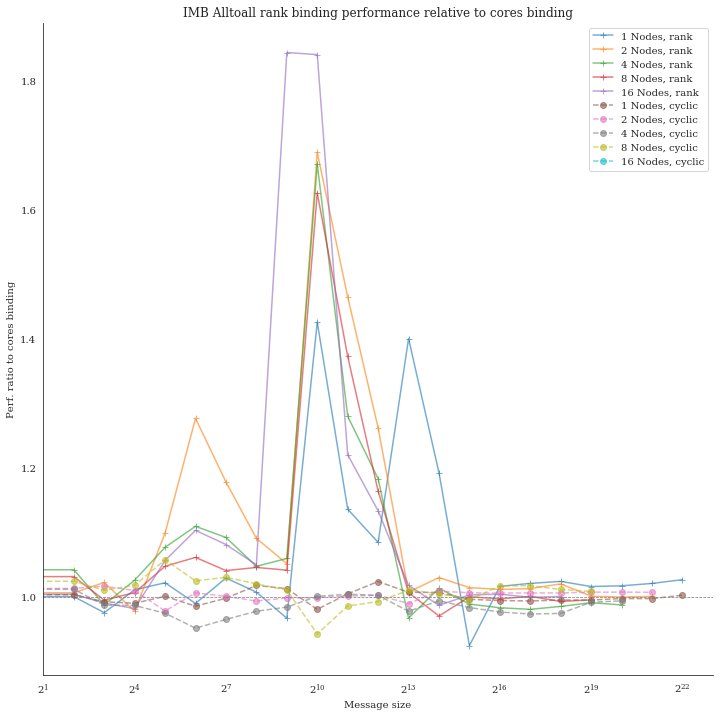

In [66]:
print("IMB {0} performance relative to cores binding".format(benchmark))
imb_ratio = imb.analyse_perf_matrix(baseline, compare, nodelist, sizelist, imb_perf, invert=True)
for nodes in nodelist:
    plt.plot(sizelist, imb.get_size_scaling(sizelist, nodes, imb_ratio['rank']), '-+', label=f'{nodes} Nodes, rank', alpha=0.6)
for nodes in nodelist:
    plt.plot(sizelist, imb.get_size_scaling(sizelist, nodes, imb_ratio['cyclic']), '--o', label=f'{nodes} Nodes, cyclic', alpha=0.6)
plt.axhline(y=1, c='gray', ls='--', lw=0.75)
sns.despine()
plt.xscale('log', basex=2)
plt.xlabel("Message size")
plt.ylabel("Perf. ratio to cores binding")
plt.title(f'IMB {benchmark} rank binding performance relative to cores binding')
plt.legend(loc='best')

## Alltoallv

In [67]:
benchmark = 'Alltoall'
imb_perf = {}
for binding in bindings:
    tdict = {}
    for nodes in nodelist:
        pattern = f'IMB_{benchmark}_{nodes}nodes_*_{binding}_*.out'
        imbfiles = filemanip.get_filelist_pattern('../results/ARCHER2_CrayMPICH8015_pinning', pattern)
        for file in imbfiles:
            imb_dict = imb.get_perf_dict(file, nodes)
            tdict.update(imb_dict)
    imb_perf[binding] = tdict

IMB Alltoall performance relative to cores binding
            #nodes
      #bytes         1         2         4         8        16
rank
           0      1.00      1.00      1.00      1.00      1.00
           4      1.00      1.01      1.04      1.03      1.00
           8      0.98      1.02      0.99      1.00      0.99
          16      1.01      0.98      1.03      1.01      0.98
          32      1.02      1.10      1.08      1.05      1.06
          64      0.99      1.28      1.11      1.06      1.10
         128      1.03      1.18      1.09      1.04      1.08
         256      1.01      1.09      1.05      1.05      1.05
         512      0.97      1.05      1.06      1.04      1.85
        1024      1.43      1.69      1.67      1.63      1.84
        2048      1.14      1.47      1.28      1.37      1.22
        4096      1.09      1.26      1.18      1.16      1.13
        8192      1.40      1.01      0.97      1.01      1.02
       16384      1.19      1.03      1.01 

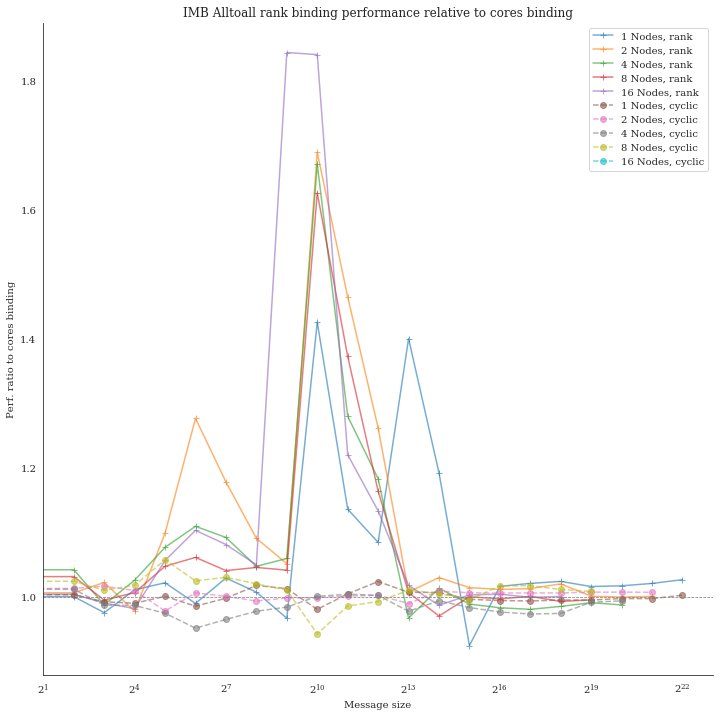

In [68]:
print("IMB {0} performance relative to cores binding".format(benchmark))
imb_ratio = imb.analyse_perf_matrix(baseline, compare, nodelist, sizelist, imb_perf, invert=True)
for nodes in nodelist:
    plt.plot(sizelist, imb.get_size_scaling(sizelist, nodes, imb_ratio['rank']), '-+', label=f'{nodes} Nodes, rank', alpha=0.6)
for nodes in nodelist:
    plt.plot(sizelist, imb.get_size_scaling(sizelist, nodes, imb_ratio['cyclic']), '--o', label=f'{nodes} Nodes, cyclic', alpha=0.6)
plt.axhline(y=1, c='gray', ls='--', lw=0.75)
sns.despine()
plt.xscale('log', basex=2)
plt.xlabel("Message size")
plt.ylabel("Perf. ratio to cores binding")
plt.title(f'IMB {benchmark} rank binding performance relative to cores binding')
plt.legend(loc='best')